In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [3]:
def normalize(input_array):
    # Input_array is a 2D NumPy array with shape (n_samples, n_features).

    norms = np.sqrt(np.sum(input_array**2, axis=1))
    norms_reshaped = norms.reshape(-1, 1)
    normalized = input_array / norms_reshaped
    normalized[~np.isfinite(normalized)] = 0
    return normalized

def get_winner_index(normalized, weights, vigilance):
    net_input = [np.dot(normalized, w.T) for w in weights]
    sorted_indices = np.argsort(net_input)[::-1]
    for winner_i in sorted_indices:
        activation = net_input[winner_i]
        if activation >= vigilance:
            return winner_i
        else:
            continue
    return None

def weight_update(weights, last_input, learning_rate):
    calculation = (learning_rate*last_input+(1-learning_rate)* weights)
    weights = calculation/math.sqrt(sum(calculation**2))
    return weights

def art2a_predict(vigi, inputs, weights):
    normalized_inputs = normalize(inputs)  # Ensure consistent normalization
    clusters = []
    for i in range(len(normalized_inputs)):
        w_i = get_winner_index(normalized_inputs[i], weights, vigi)
        if w_i is not None:
            clusters.append(w_i)
        else:
            clusters.append(-1)      

    return np.array(clusters)


def art2a_train(vigi, inputs, feature_size, epochs=1, verbose=False, learning_rate=0.01):
    normalized_inputs = normalize(inputs)
    weight_array = normalized_inputs[0].reshape(1, feature_size).copy()
    clusters = []
    
    for epoch in range(epochs):
        for i in range(len(normalized_inputs)):
            w_i = get_winner_index(normalized_inputs[i], weight_array, vigi)
            
            if w_i is not None:
                weight_array[w_i] = weight_update(weight_array[w_i], normalized_inputs[i], learning_rate) # BUG: I was passing in the normal inputs not the normalized inputs
                if epoch == epochs - 1:
                    clusters.append(w_i)
            else:
                weight_array = np.vstack([weight_array, normalized_inputs[i]])
                if epoch == epochs - 1:
                    clusters.append(len(weight_array) - 1)

        if verbose:
            print(f"Epoch {epoch + 1} for vigilance value {vigi}")
    
    print(f"Vigilance value {vigi}: {max(clusters) + 1} clusters found.")
    return np.array(clusters), weight_array

def plot_fill_decision_boundary(predict, X, y, weights, vigi, xlabel='', ylabel=''):
    buffer = 0.5
    x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
    y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    grid_data = np.c_[xx.ravel(), yy.ravel()]
    y_hat = predict(vigi, grid_data, weights)
    y_hat = y_hat.reshape(xx.shape)
    contour = plt.contourf(xx, yy, y_hat, alpha=0.8, cmap='viridis')
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=40, cmap='viridis')
    cbar = plt.colorbar(contour)
    cbar.set_label('Cluster')
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(np.arange(np.floor(x_min), np.ceil(x_max), step=1))
    plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max), step=1))
    plt.legend(*scatter.legend_elements(), title="Clusters")
    

def art2a_predict_grid(vigi, inputs, weights):
    normalized_inputs = normalize(inputs)
    clusters = []
    for i in range(len(normalized_inputs)):
        w_i = get_winner_index(normalized_inputs[i], weights, vigi)
        if w_i is not None:
            clusters.append(w_i)
        else:
            clusters.append(-1)
    return np.array(clusters)

Epoch 1 for vigilance value 0.9
Epoch 2 for vigilance value 0.9
Epoch 3 for vigilance value 0.9
Epoch 4 for vigilance value 0.9
Epoch 5 for vigilance value 0.9
Epoch 6 for vigilance value 0.9
Epoch 7 for vigilance value 0.9
Epoch 8 for vigilance value 0.9
Epoch 9 for vigilance value 0.9
Epoch 10 for vigilance value 0.9
Vigilance value 0.9: 10 clusters found.


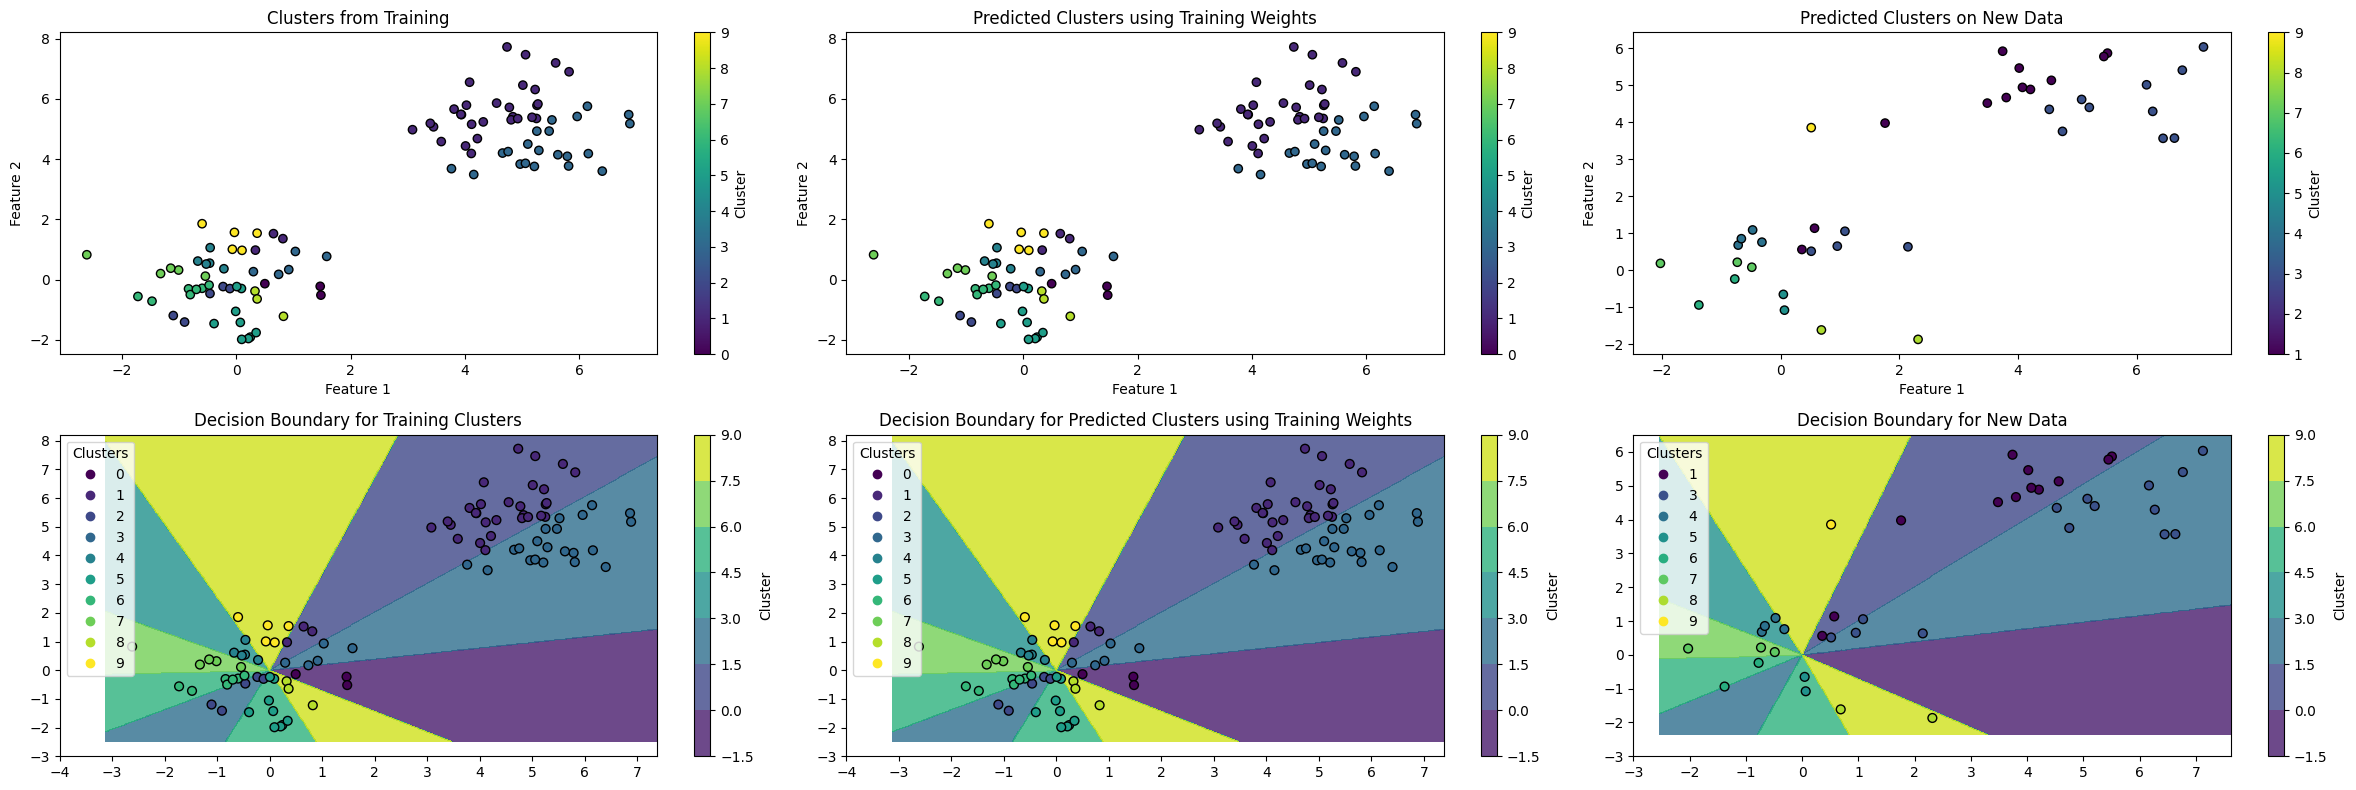

In [4]:
def test_art2a():
    np.random.seed(42)
    
    cluster_1 = np.random.normal(0, 1, size=(50, 2)) 
    cluster_2 = np.random.normal(5, 1, size=(50, 2))
    data = np.vstack((cluster_1, cluster_2))
    feature_size = data.shape[1]

    vigi = 0.9

    clusters_train, weights = art2a_train(
        vigi, data, feature_size, epochs=10, verbose=True, learning_rate=0.01
    )

    clusters_predict_train = art2a_predict(
        vigi, data, weights
    )

    test_cluster_1 = np.random.normal(0, 1, size=(20, 2))
    test_cluster_2 = np.random.normal(5, 1, size=(20, 2))
    test_data = np.vstack((test_cluster_1, test_cluster_2))

    clusters_new_data = art2a_predict(
        vigi, test_data, weights
    )

    plt.figure(figsize=(24, 8))
    plt.subplot(2, 3, 1)
    plt.scatter(data[:, 0], data[:, 1], c=clusters_train, cmap='viridis', edgecolors='k')
    plt.title(f'Clusters from Training')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')

    plt.subplot(2, 3, 2)
    plt.scatter(data[:, 0], data[:, 1], c=clusters_predict_train, cmap='viridis', edgecolors='k')
    plt.title(f'Predicted Clusters using Training Weights')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')

    plt.subplot(2, 3, 3)
    plt.scatter(test_data[:, 0], test_data[:, 1], c=clusters_new_data, cmap='viridis', edgecolors='k')
    plt.title(f'Predicted Clusters on New Data')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')

    plt.subplot(2, 3, 4)
    plot_fill_decision_boundary(art2a_predict_grid, data, clusters_train, weights, vigi)
    plt.title(f'Decision Boundary for Training Clusters')

    plt.subplot(2, 3, 5)
    plot_fill_decision_boundary(art2a_predict_grid, data, clusters_predict_train, weights, vigi)
    plt.title(f'Decision Boundary for Predicted Clusters using Training Weights')


    plt.subplot(2, 3, 6)
    plot_fill_decision_boundary(art2a_predict_grid, test_data, clusters_new_data, weights, vigi)
    plt.title(f'Decision Boundary for New Data')

    plt.tight_layout()
    plt.show()

test_art2a()